In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = [10, 5]

# Checking the FEM solver

## Defining the equation

In [241]:
# Parameters
f = lambda x: 0  # Source function
a, b, k = -1, +1, 3 * np.pi  # Range and frequency

# Exact solution and its derivative
alpha, beta = 1 / np.pi, 5 / np.pi
u = lambda x: alpha * np.cos(k * x) + 1j * beta * np.sin(k * x)
u_x = lambda x: -alpha * k * np.sin(k * x) + 1j * beta * k * np.cos(k * x)

# Boundary conditions
ga = u_x(a) + 1j * k * u(a)
gb = u_x(b) - 1j * k * u(b)

## Solving the equation with FEM

In [242]:
from FEM_Solver import FEM_Helmholtz

solver = FEM_Helmholtz(f=f, k=k, a=a, b=b, ga=ga, gb=gb, N=100)
solver.solve()
r = solver.sol

/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/scipy/special/orthogonal.py:331: RuntimeWarning: invalid value encountered in double_scalars
  hn *= _gam(n + beta + 1.0) / _gam(n + 1) / _gam(n + ab1)
/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/scipy/special/orthogonal.py:332: RuntimeWarning: invalid value encountered in double_scalars
  kn = _gam(2 * n + ab1) / 2.0**n / _gam(n + 1) / _gam(n + ab1)


## Plotting the solver matrices

Condition number of A: 358320.12681452686


Text(0.5, 1.0, 'Im(err)')

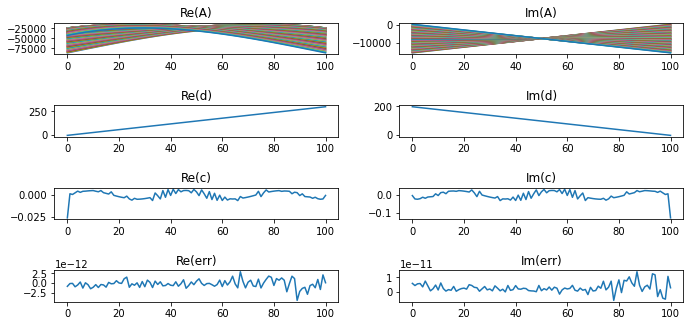

In [243]:
print('Condition number of A:', np.linalg.cond(solver.A))

fig, axs = plt.subplots(4, 2)
fig.tight_layout(pad=3.0)

for Arow in solver.A:
    axs[0, 0].plot(Arow.real)
    axs[0, 1].plot(Arow.imag)
axs[0, 0].set_title('Re(A)')
axs[0, 1].set_title('Im(A)')

axs[1, 0].plot(solver.d.real)
axs[1, 1].plot(solver.d.imag)
axs[1, 0].set_title('Re(d)')
axs[1, 1].set_title('Im(d)')

axs[2, 0].plot(solver.c.real)
axs[2, 1].plot(solver.c.imag)
axs[2, 0].set_title('Re(c)')
axs[2, 1].set_title('Im(c)')

axs[3, 0].plot((solver.A @ solver.c - solver.d).real)
axs[3, 1].plot((solver.A @ solver.c - solver.d).imag)
axs[3, 0].set_title('Re(err)')
axs[3, 1].set_title('Im(err)')

## Plotting the basis functions

In [244]:
# fig, ax = plt.subplots()
# xpts = np.linspace(a, b, N + 1)
# for i in range(N + 1):
#     ypts = Solver.phi(i)(xpts)
#     ax.plot(xpts, ypts)
# ax.set_ylim([0, 1])
# ax.set_xlim([a, b])

## Plotting the numerical solution vs. exact solution

[Text(0.5, 24.0, 'x'), Text(367.36363636363626, 0.5, 'Imag')]

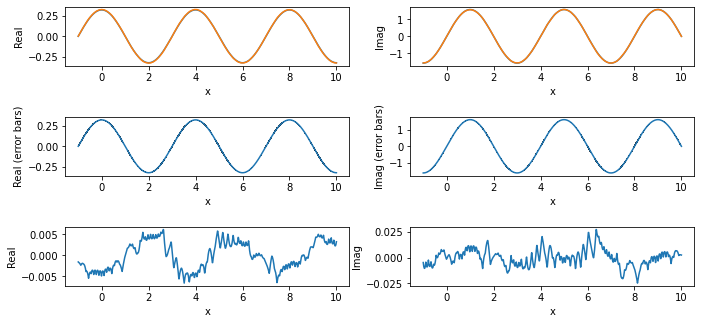

In [245]:
xpts = np.linspace(a, b, 1000)
upts = np.zeros_like(xpts, dtype=complex)
rpts = np.zeros_like(xpts, dtype=complex)

for i, x in enumerate(xpts):
    upts[i] = u(x)
    rpts[i] = r(x)

fig, axs = plt.subplots(3, 2)
fig.tight_layout(pad=3.0)

axs[0, 0].plot(xpts, upts.real)
axs[0, 0].plot(xpts, rpts.real)
axs[0, 0].set(xlabel='x', ylabel='Real')
axs[0, 1].plot(xpts, upts.imag)
axs[0, 1].plot(xpts, rpts.imag)
axs[0, 1].set(xlabel='x', ylabel='Imag')

axs[1, 0].errorbar(xpts, upts.real, yerr=upts.real - rpts.real, ecolor='black')
axs[1, 0].set(xlabel='x', ylabel='Real (error bars)')
axs[1, 1].errorbar(xpts, upts.imag, yerr=upts.imag - rpts.imag, ecolor='black')
axs[1, 1].set(xlabel='x', ylabel='Imag (error bars)')

axs[2, 0].plot(xpts, upts.real - rpts.real)
axs[2, 0].set(xlabel='x', ylabel='Real')
axs[2, 1].plot(xpts, upts.imag - rpts.imag)
axs[2, 1].set(xlabel='x', ylabel='Imag')